In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 指定默認字形：解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False

In [73]:
df = pd.read_excel('KH-1982-2018.xlsx')
df.head()

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
0,5.1,0.57,44.3,29,25.65,3.37,22.28,2.237,0.195,2.04,1.65,27.01,69.31
1,5.0,0.44,43.7,35,17.93,1.76,16.17,2.353,0.176,2.18,1.52,26.17,78.20
2,3.4,0.46,49.6,32,15.56,1.80,13.78,2.129,0.136,1.99,2.27,26.18,72.71
3,3.8,0.53,45.0,30,20.34,1.61,18.72,2.239,0.224,2.02,1.73,27.35,66.75
4,6.7,0.47,43.7,29,24.65,3.49,21.17,2.155,0.186,1.97,1.82,27.80,67.62


In [74]:
df.columns

Index(['SO2', 'CO', 'O3', 'PM25', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity'],
      dtype='object')

In [75]:
df["SO2"] = pd.to_numeric(df.SO2, errors='coerce')
df["CO"] = pd.to_numeric(df.CO, errors='coerce')
#df["CO2"] = pd.to_numeric(df.CO2, errors='coerce')
df["O3"] = pd.to_numeric(df.O3, errors='coerce')
df["PM25"] = pd.to_numeric(df.PM25, errors='coerce')
df["Nox"] = pd.to_numeric(df.Nox, errors='coerce')
df["NO"] = pd.to_numeric(df.NO, errors='coerce')
df["NO2"] = pd.to_numeric(df.NO2, errors='coerce')
df["THC"] = pd.to_numeric(df.THC, errors='coerce')
df["NMHC"] = pd.to_numeric(df.NMHC, errors='coerce')
df["CH4"] = pd.to_numeric(df.CH4, errors='coerce')
df["WindSpeed"] = pd.to_numeric(df.WindSpeed, errors='coerce')
df["TEMP"] = pd.to_numeric(df.TEMP, errors='coerce')
df["Humidity"] = pd.to_numeric(df.Humidity, errors='coerce')

In [76]:
df.dtypes

SO2          float64
CO           float64
O3           float64
PM25           int64
Nox          float64
NO           float64
NO2          float64
THC          float64
NMHC         float64
CH4          float64
WindSpeed    float64
TEMP         float64
Humidity     float64
dtype: object

In [78]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [79]:
X = df.drop(['PM25'], axis=1)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

In [81]:
X_train.shape, y_train.shape

((280, 12), (280,))

In [82]:
X_test.shape, y_test.shape

((121, 12), (121,))

In [83]:
X.columns

Index(['SO2', 'CO', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity'],
      dtype='object')

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [85]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
lin_pred = regr.predict(X_test)

In [87]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.9101721045818417

In [88]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [ -0.69840943  -9.00508323   0.24863781 -29.59666709  28.86570143
  30.59322777 -89.85269969 119.62046794 106.26429001   2.18980547
  -1.2112113   -0.13323809]
Root mean squared error: 3.74
Mean absolute error: 2.76
R-squared: 0.91


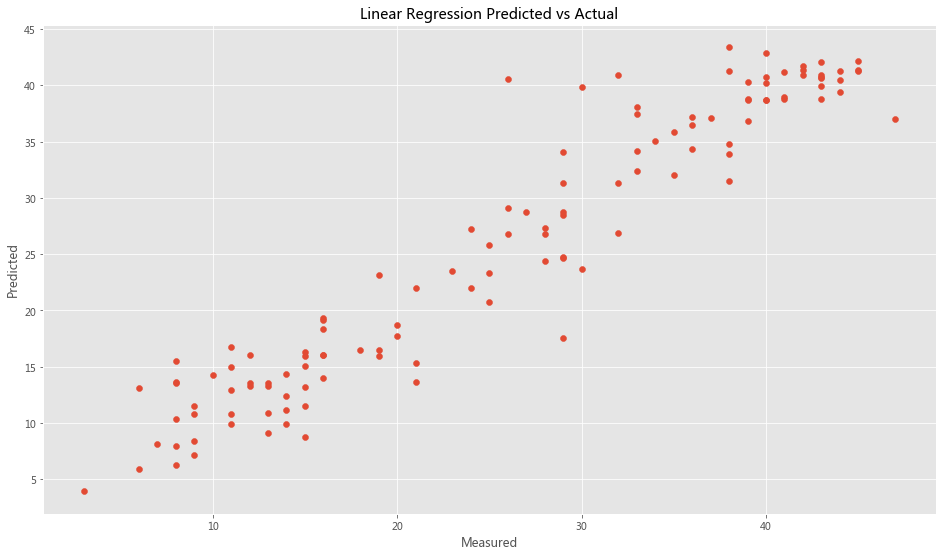

In [89]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [90]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [91]:
mlp.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [92]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.8532397997401182

In [93]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [94]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 4.78
Mean absolute error: 3.86
R-squared: 0.85


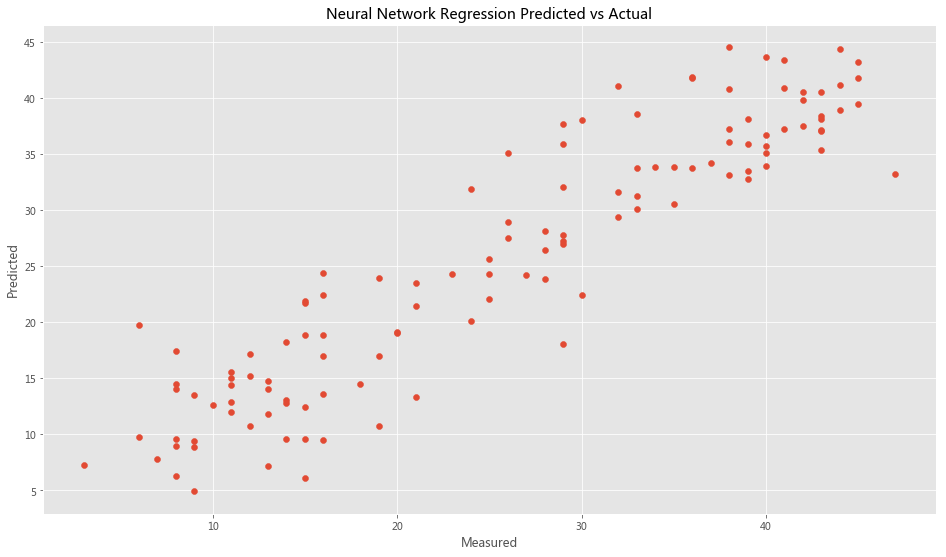

In [95]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [96]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [97]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.8873130463758103

In [99]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [100]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 4.19


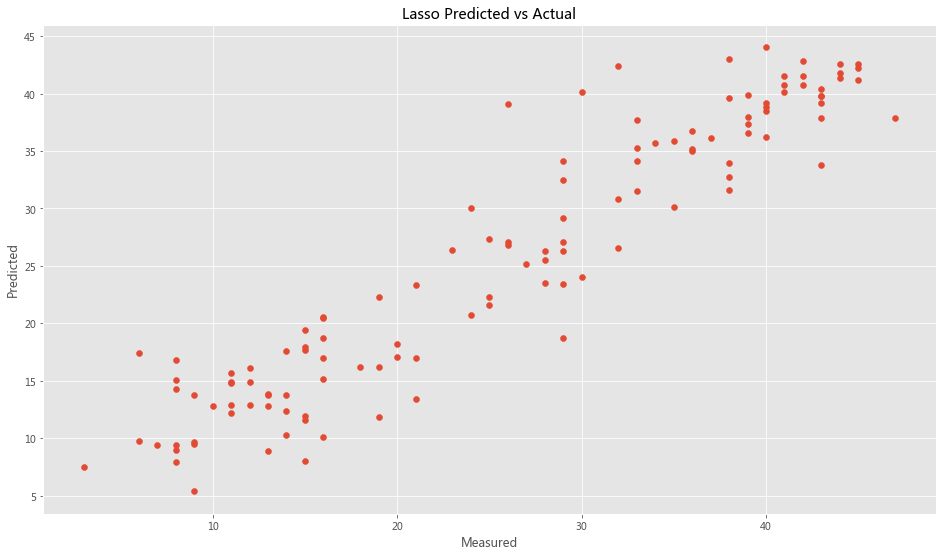

In [101]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [102]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

In [103]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [104]:


elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score



0.888862421794889

In [105]:
elasticnet_pred = elasticnet.predict(X_test)

In [106]:


# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))



Root mean squared error: 4.16


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [108]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [109]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.9023960871039343

In [110]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [111]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 3.90
Mean absolute error: 3.02
R-squared: 0.90


In [112]:
X.columns

Index(['SO2', 'CO', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity'],
      dtype='object')

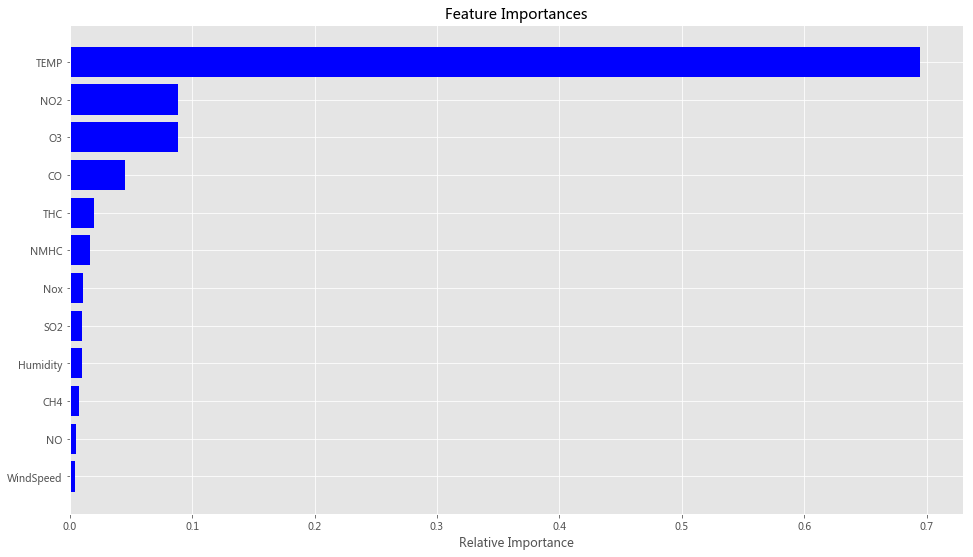

In [113]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

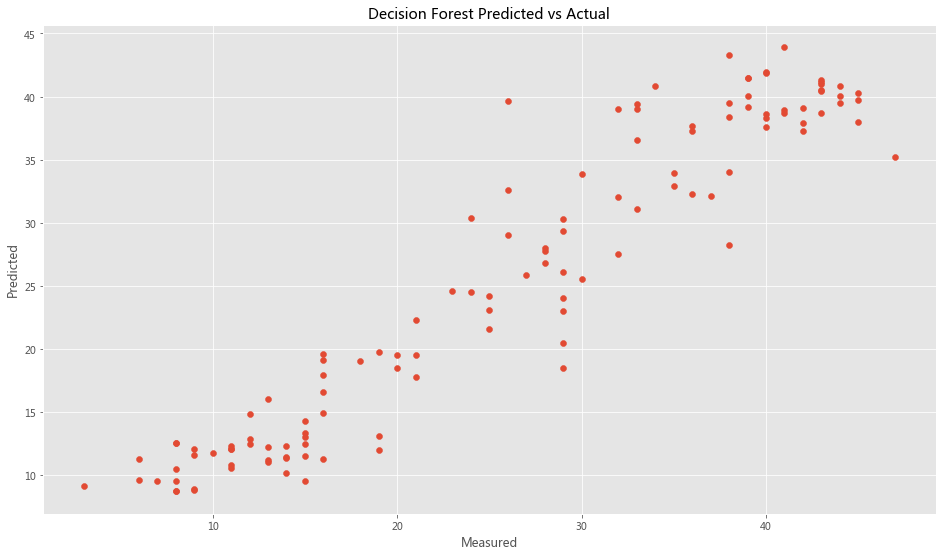

In [114]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

In [115]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [116]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [117]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.9167571974098775

In [118]:
extratree_pred = extra_tree.predict(X_test)

In [119]:


print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))



Root mean squared error: 3.60


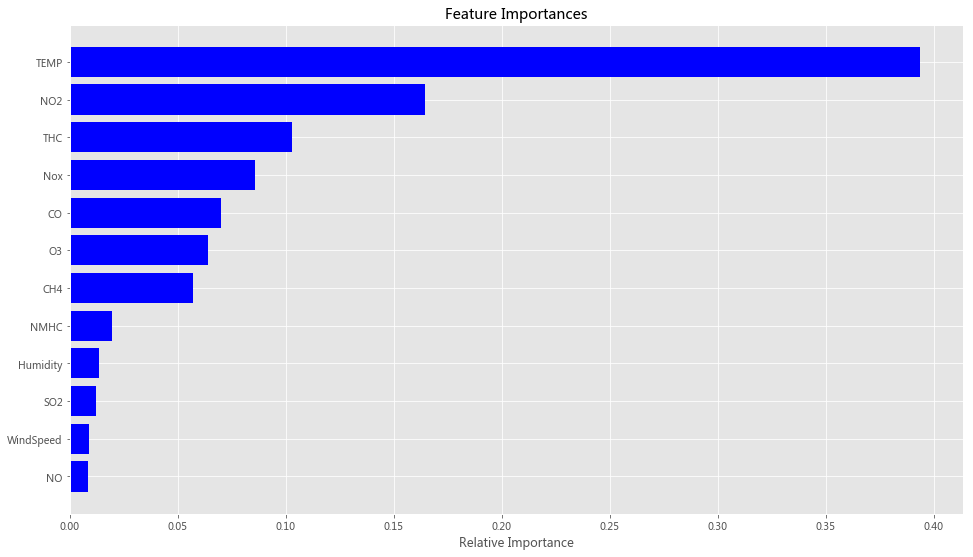

In [120]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

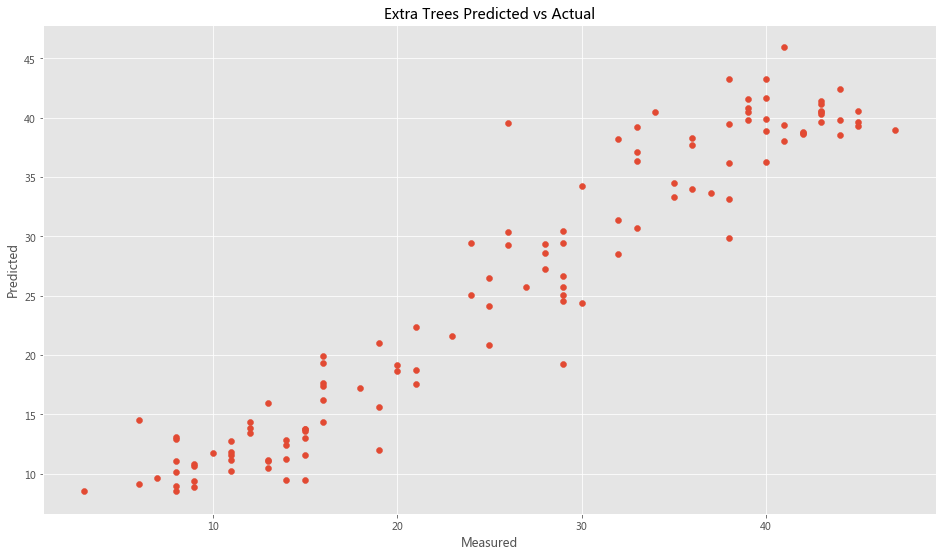

In [121]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [123]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [124]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.8654467934849918

In [125]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.892229896203619

In [126]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [127]:


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))



Coefficients: 
 [ -0.69840943  -9.00508323   0.24863781 -29.59666709  28.86570143
  30.59322777 -89.85269969 119.62046794 106.26429001   2.18980547
  -1.2112113   -0.13323809]
Root mean squared error: 4.09
Mean absolute error: 3.09
R-squared: 0.89


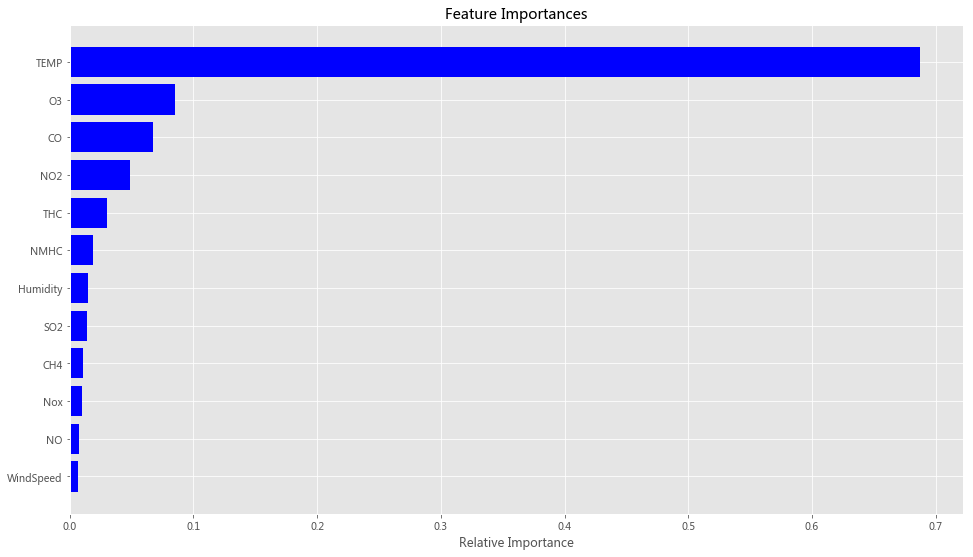

In [128]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

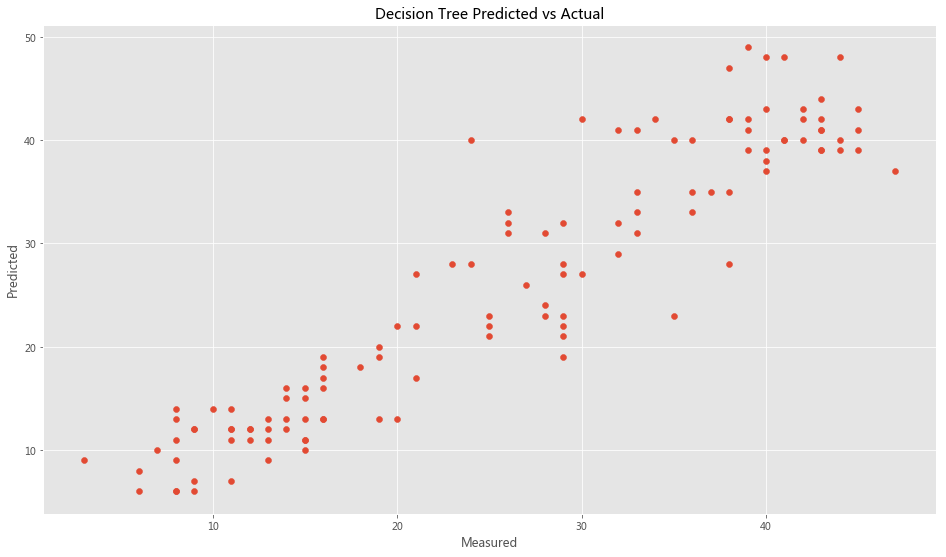

In [129]:
plt.scatter(y_test, tree_1_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

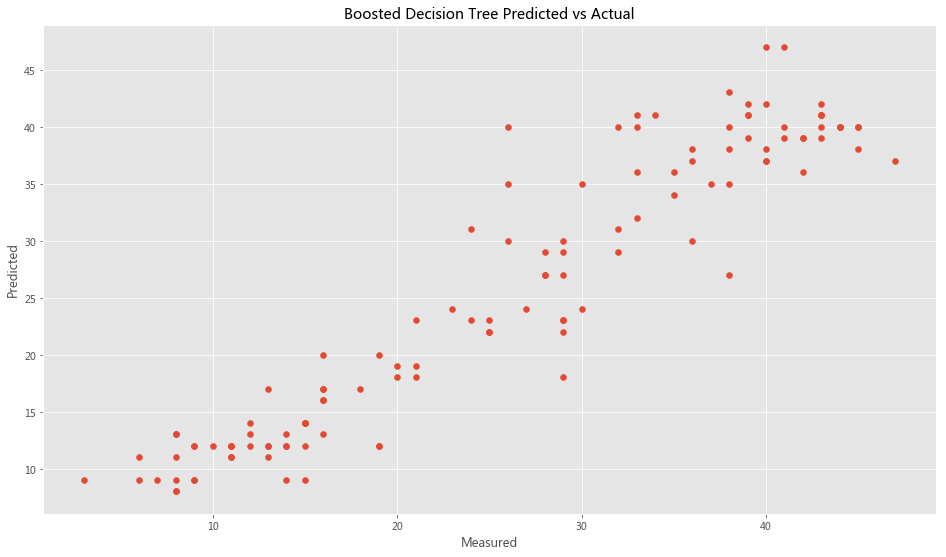

In [130]:
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

In [131]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [132]:
xboost.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [133]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.8902505097601974

In [134]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [135]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 4.13


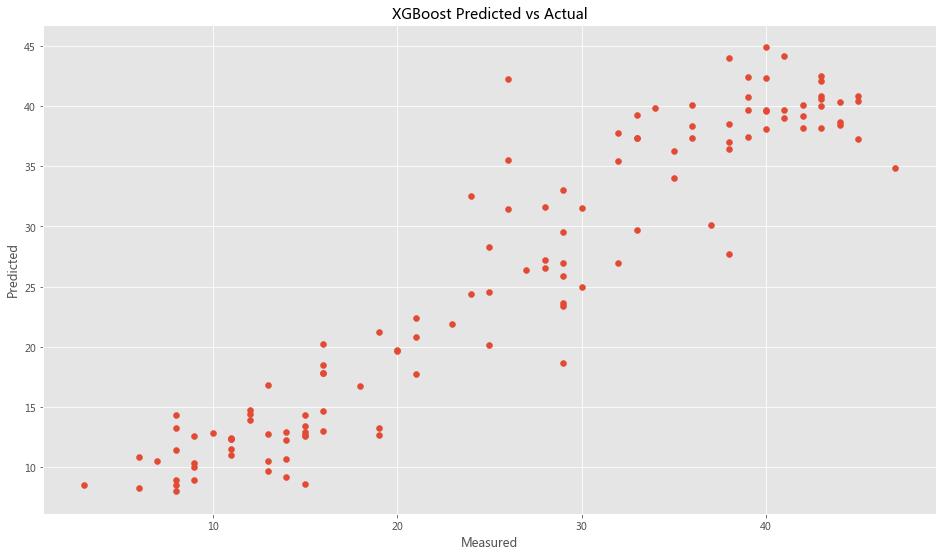

In [136]:
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

In [137]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.9101721045818417
Neural network regression score:  0.8532397997401182
Lasso regression score:  0.8873130463758103
ElasticNet regression score:  0.888862421794889
Decision forest score:  0.9023960871039343
Extra Trees score:  0.9167571974098775
Boosted decision tree score:  0.892229896203619
XGBoost score: 0.8902505097601974


RMSE:
Linear regression RMSE: 3.74
Neural network RMSE: 4.78
Lasso RMSE: 4.19
ElasticNet RMSE: 4.16
Decision forest RMSE: 3.90
Extra Trees RMSE: 3.60
Boosted decision tree RMSE: 4.09
XGBoost RMSE: 4.13
